# Chapter 7

In [1]:
library(ISLR)
library(boot)
library(MASS)
library(leaps)
library(gam)
library(splines)
#library(Rfast)

Warning message:
"package 'ISLR' was built under R version 3.6.3"Warning message:
"package 'leaps' was built under R version 3.6.3"Warning message:
"package 'gam' was built under R version 3.6.3"Loading required package: splines
Loading required package: foreach
Loaded gam 1.16.1



## Functions

In [2]:
plot_pred= function(x, y, preds, grid, xlab, ylab){
    plot(x, y, xlab = xlab, ylab = ylab, col="darkgrey")
    lines(grid, preds$fit, lwd=3, col='blue')
 #   se.bands=cbind(preds$fit +2*preds$se.fit ,preds$fit -2* preds$se.fit)
 #   matlines (age.grid, se.bands, lwd=1, col=" blue",lty=3)
    }
regsubresult=function(reg.sum){
    print('Adjusted R2')
    print(which.max(reg.sum$adjr2))
    print(max(reg.sum$adjr2))
    print("C_p")
    print(which.min(reg.sum$cp))
    print(min(reg.sum$cp))
    print("BIC")
    print(which.min(reg.sum$bic))
    print(min(reg.sum$bic))
}
regsubplot=function(reg.sum){
    par(mfrow = c(2, 2))
    plot(1:8, reg.sum$adjr2, type="b", col="blue", xlab = "Model", ylab = "R2")
    plot(1:8, reg.sum$cp, type="b", col="blue",xlab = "Model", ylab = "C_p")
    plot(1:8, reg.sum$bic, type="b", , col = "blue", xlab = "Model", ylab = "BIC")
   }

## Problem 1

(a) For $x<=\xi$ $a_1=\beta_0, b_1=\beta_1, c_1 = \beta_2, d_1=\beta_3$

(b) For x>$\xi$ $a_2=\beta_0-\beta_4\xi^3, b_2=\beta_1+3\beta_4\xi^2, c_2 = \beta_2-3\beta_4\xi, d_2 = \beta_4 +\beta_3 $

(c), (d)  and (e) is possible to show considering f(x) and $f_1(x)$ because last term in f(x) and its derivatives, first and second, always go to zero and so are continious from both sides at $\xi$. Rest of equation is the same on both sides.

## Problem 2

(a) λ = ∞, m = 0.

In this case $g^{(0)}$ will go to 0.

(b) λ = ∞, m = 1.

In this case first derivative, slope $g^{(1)}$, will go to 0.

(c) λ = ∞, m = 2.

In this case, second derivative from g goes to zero, function g smooth out.

(d) λ = ∞, m = 3.

In this case third derivative from g goes to zero.

(e) λ = 0, m = 3.

In this case last penalty term goes to zero.

## Problem 3

Suppose we fit a curve with basis functions b1(X) = X, b2(X) = (X − 1)2I(X ≥ 1). (Note that I(X ≥ 1) equals 1 for X ≥ 1 and 0
otherwise.) We fit the linear regression model
Y = β0 + β1b1(X) + β2b2(X) + ,
and obtain coefficient estimates βˆ0 = 1, βˆ1 = 1, βˆ2 = −2. Sketch the
estimated curve between X = −2 and X = 2. Note the intercepts,
slopes, and other relevant information

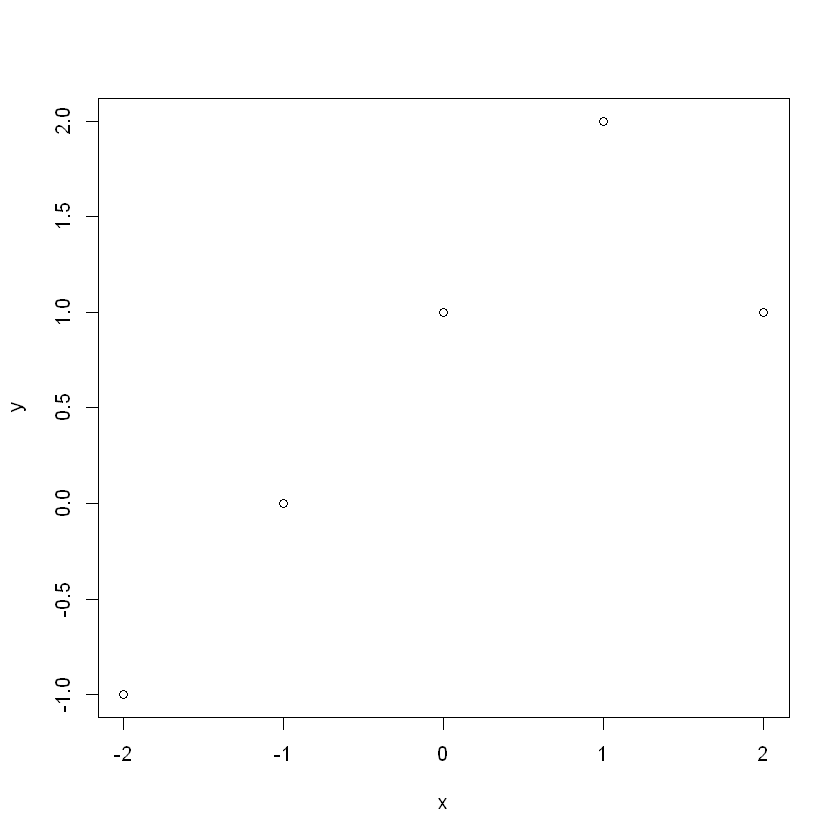

In [3]:
x = -2:2
y = 1 + x + -2 * (x-1)^2 * I(x>1)
plot(x, y)

## Problem 4

Suppose we fit a curve with basis functions b1(X) = I(0 ≤ X ≤ 2) −
(X −1)I(1 ≤ X ≤ 2), b2(X)=(X −3)I(3 ≤ X ≤ 4) +I(4 < X ≤ 5).
We fit the linear regression model
Y = β0 + β1b1(X) + β2b2(X) + ,
and obtain coefficient estimates βˆ0 = 1, βˆ1 = 1, βˆ2 = 3. Sketch the
estimated curve between X = −2 and X = 2. Note the intercepts,
slopes, and other relevant information.

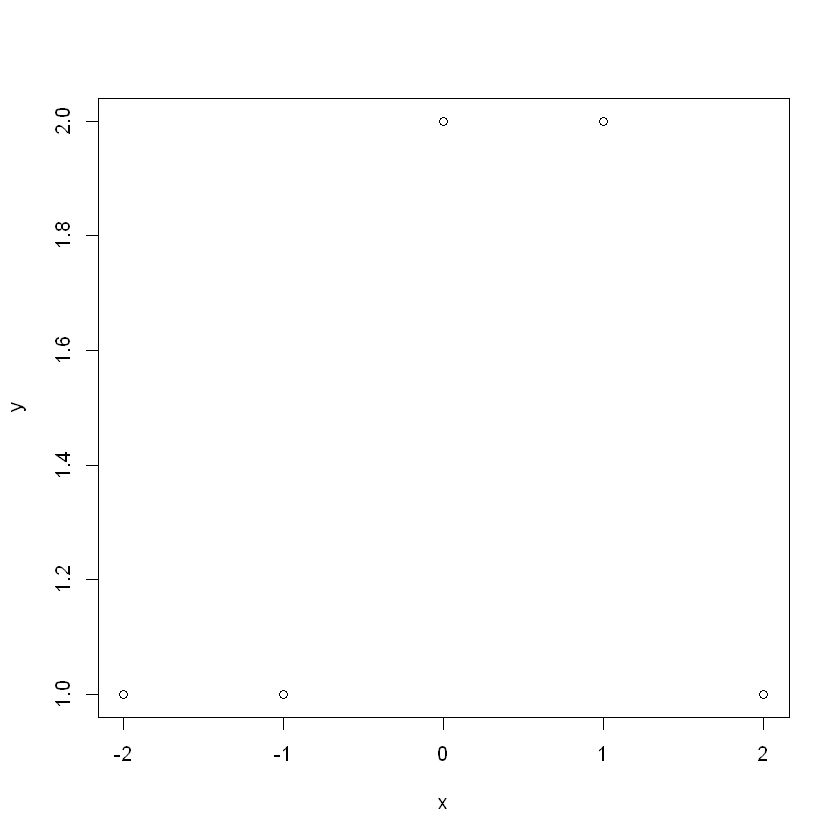

In [53]:
x = -2:2
y = 1 + I(x>=0)-(x-1)*I(x>=1) + 3 * (x-3) *I(x>=3)+ I(x>4)
plot(x, y)

## Problem 5

(a) As λ → ∞, will $\hat{g}_2$  or $\hat{g}_2$  have the smaller training RSS?

In this 1st case third derivative from g goes to zero, in the second case it may start from 4th. So degree of g can be smaller in the first case, it can be less flexible. $\hat{g}_2$ more possible have smaller training RSS.

(b) As λ → ∞, will $\hat{g}_2$  or $\hat{g}_2$  have the smaller test RSS?

So from above test RSS will be smaller for $\hat{g}_1$, $\hat{g}_2$  can overfit

(c) For λ = 0, will $\hat{g}_2$  or $\hat{g}_2$  have the smaller training and test RSS?

In this case $\hat{g}_2$  and $\hat{g}_1$ are the same with the same RSS 

## Problem 6

In [5]:
head(Wage)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.04315
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.47602
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.98218
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.68529
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.04315
376662,2008,54,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.11574


(a) Perform polynomial regression to predict wage using age. Use
cross-validation to select the optimal degree d for the polynomial. What degree was chosen, and how does this compare to
the results of hypothesis testing using ANOVA? Make a plot of
the resulting polynomial fit to the data

In [6]:
set.seed(1)
deg = 10
cv.errors = rep(NA, deg)
for (i in 1:deg) {
  fit = glm(wage ~ poly(age, i), data = Wage)
  cv.errors[i] = cv.glm(Wage, fit)$delta[1]
}

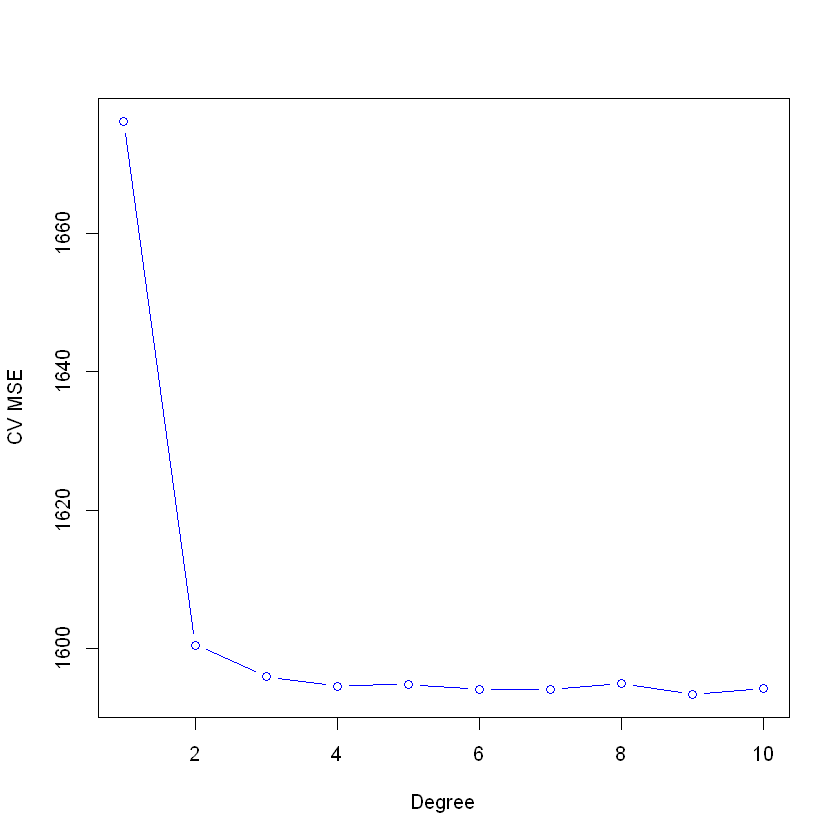

In [7]:
plot(1:deg, cv.errors, xlab = 'Degree', ylab = 'CV MSE', type = 'b', col="blue")
deg.min = which.min(cv.errors)

In [8]:
deg.min

[1] 9

According to ANOVA function on p.290 4 degrees is enough.

In [9]:
age.range = range(Wage$age)
age.grid = seq(from = age.range[1], to = age.range[2])

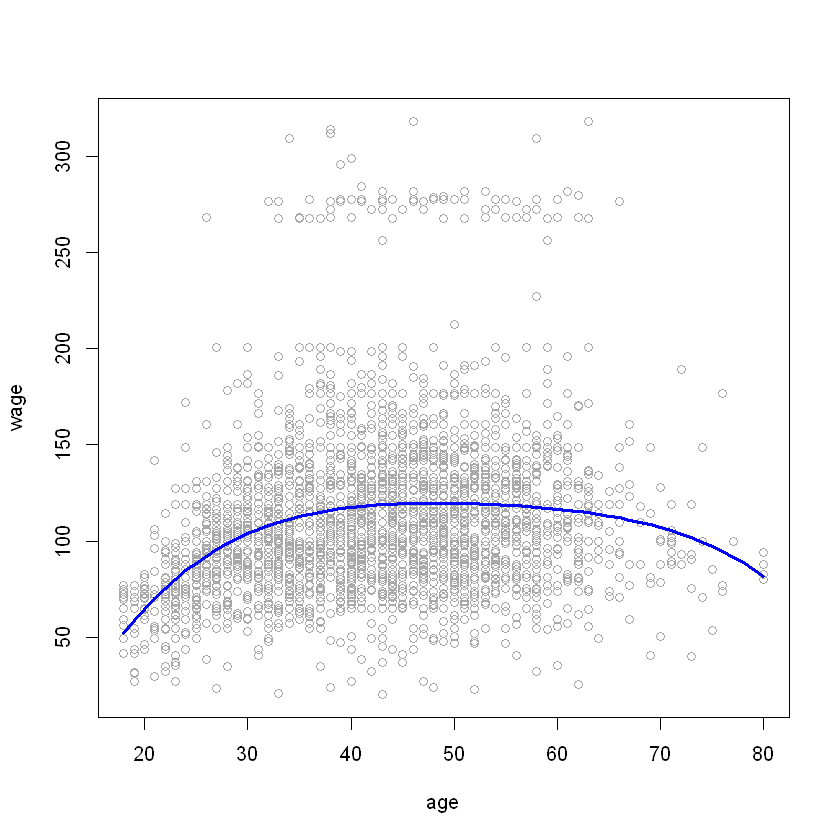

In [10]:
fit = lm(wage ~ poly(age, 4), data = Wage)
preds=predict(fit, newdata = list(age=age.grid), se=TRUE)
plot_pred(Wage$age, Wage$wage, preds, age.grid, 'age', 'wage')

(b) Fit a step function to predict wage using age, and perform crossvalidation to choose the optimal number of cuts. Make a plot of
the fit obtained

In [11]:
steps=10
cv.errors = rep(NA, steps)
for (i in 2:steps) {
  Wage$age.cut =  cut(Wage$age, i)
  fit = glm(wage ~ age.cut, data = Wage)
  cv.errors[i] = cv.glm(Wage, fit)$delta[1]
}

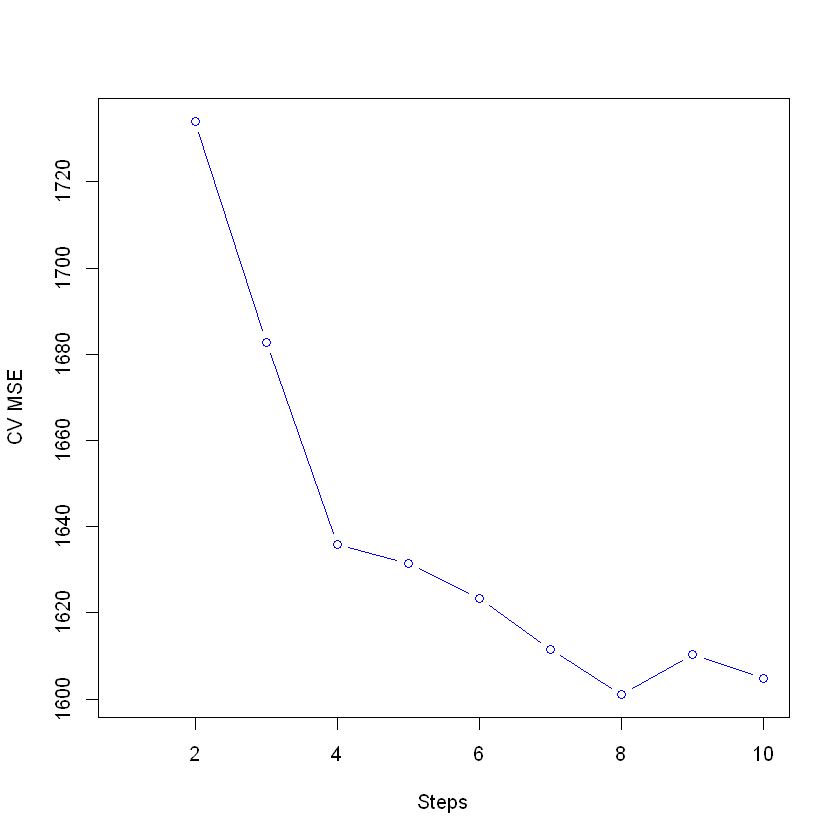

In [12]:
plot(1:steps, cv.errors, xlab = 'Steps', ylab = 'CV MSE', type = 'b', col="blue")
deg.min = which.min(cv.errors)

In [13]:
deg.min

[1] 8

## Problem 7

In [14]:
gam.m1 = gam(wage ~ year + poly(age, 5) + education, data = Wage)
gam.m2 = gam(wage ~ year + poly(age, 5) + education + jobclass, data = Wage)
gam.m3 = gam(wage ~ year + poly(age, 5) + education + maritl, data = Wage)
gam.m4 = gam(wage ~ year + poly(age, 5) + education + jobclass + maritl+health_ins, data = Wage)
#gam.m5 = gam(wage~poly(age)+year+education+maritl+jobclass+health_ins, data=Wage)
anova(gam.m1, gam.m2, gam.m3, gam.m4, test='F')

Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"

Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
2989,3700181,NA,NA,NA,NA
2988,3687481,1,12700.06,11.06287,8.913996e-04
2985,3605641,3,81839.80,23.76323,3.397229e-15
2983,3424452,2,181189.01,78.91581,4.010757e-34


Warning message in plot.window(...):
""all.terms" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""all.terms" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""all.terms" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""all.terms" is not a graphical parameter"Warning message in box(...):
""all.terms" is not a graphical parameter"Warning message in title(...):
""all.terms" is not a graphical parameter"Warning message in plot.window(...):
""all.terms" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""all.terms" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""all.terms" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""all.terms" is not a graphical parameter"Warning message in box(...):
""all.terms" is not a graphical parameter"Warning messa

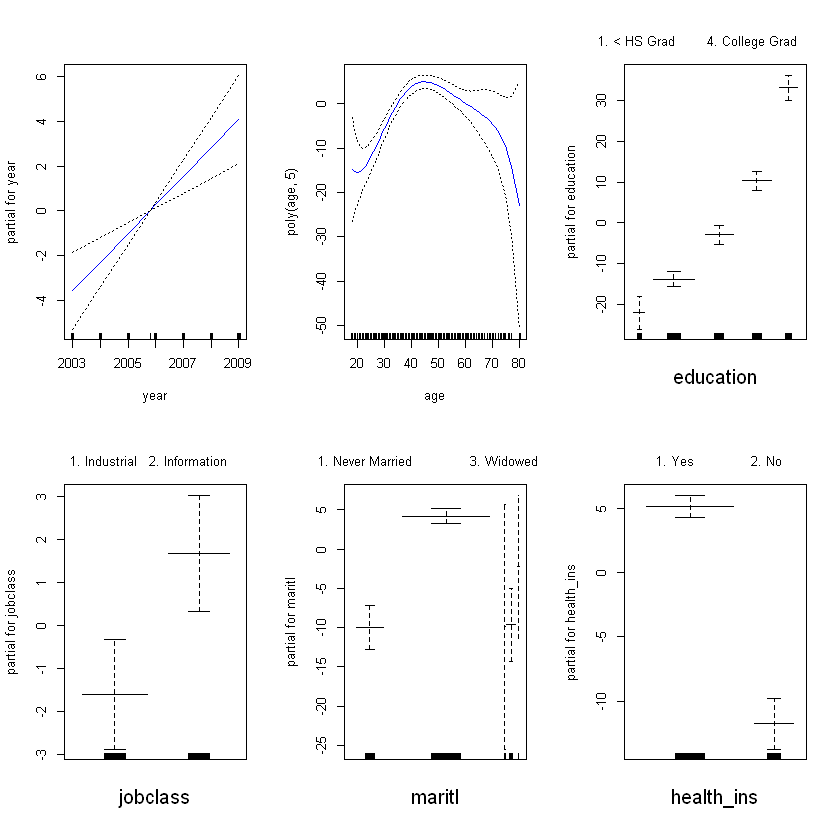

In [15]:
par(mfrow = c(2, 3))
plot(gam.m4, se = T, col = "blue",  all.terms = TRUE)

## Problem 8

See Python notebook

## Problem 9

This question uses the variables dis (the weighted mean of distances
to five Boston employment centers) and nox (nitrogen oxides concentration in parts per 10 million) from the Boston data. We will treat dis as the predictor and nox as the response.


In [16]:
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


(a) Use the poly() function to fit a cubic polynomial regression to
predict nox using dis. Report the regression output, and plot
the resulting data and polynomial fits.

In [17]:
fit=lm(nox∼poly(dis , 3), data=Boston)
coef(summary (fit))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.5546951,0.00275939,201.020894,0.000000e+00
"poly(dis, 3)1",-2.0030959,0.06207094,-32.271071,1.597201e-124
"poly(dis, 3)2",0.8563300,0.06207094,13.795987,6.133104e-37
"poly(dis, 3)3",-0.3180490,0.06207094,-5.123959,4.274950e-07


In [18]:
#grid for predictions
dis=Boston$dis
dislims =range(dis)
dis.grid=seq(from=dislims [1],to=dislims [2])
preds=predict (fit ,newdata =list(dis=dis.grid),se=TRUE)

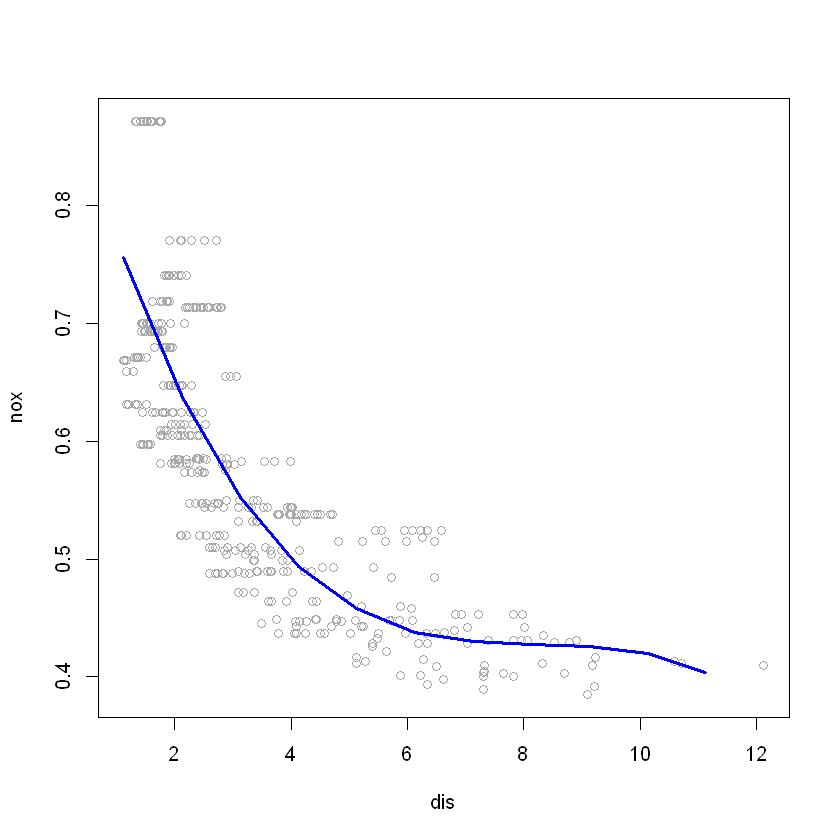

In [19]:
plot_pred(Boston$dis, Boston$nox, preds, dis.grid, 'dis', 'nox')

(b) Plot the polynomial fits for a range of different polynomial
degrees (say, from 1 to 10), and report the associated residual
sum of squares.

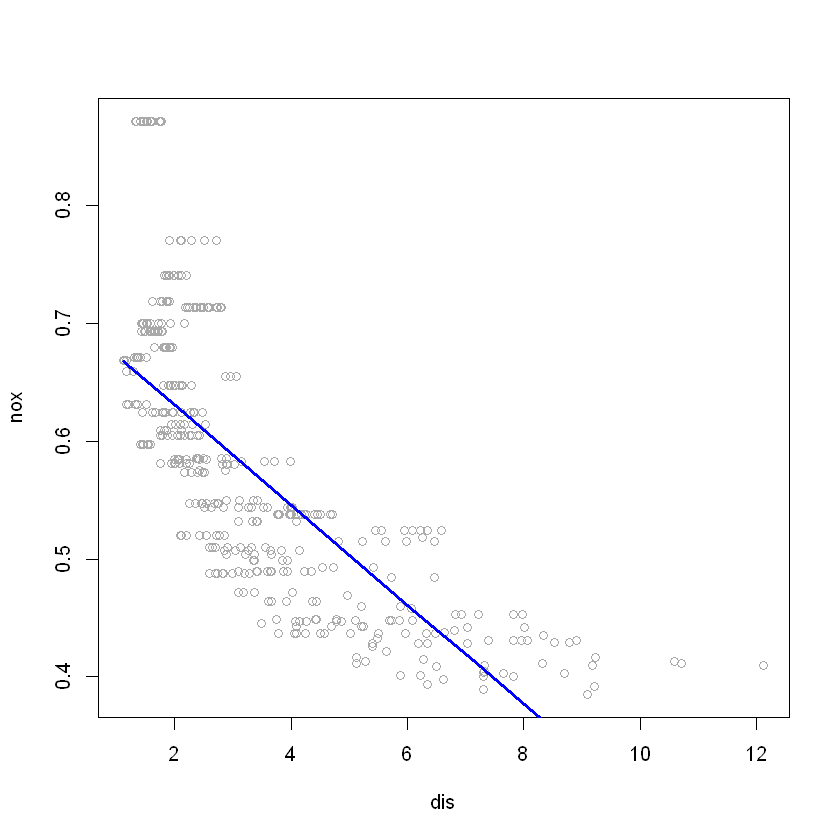

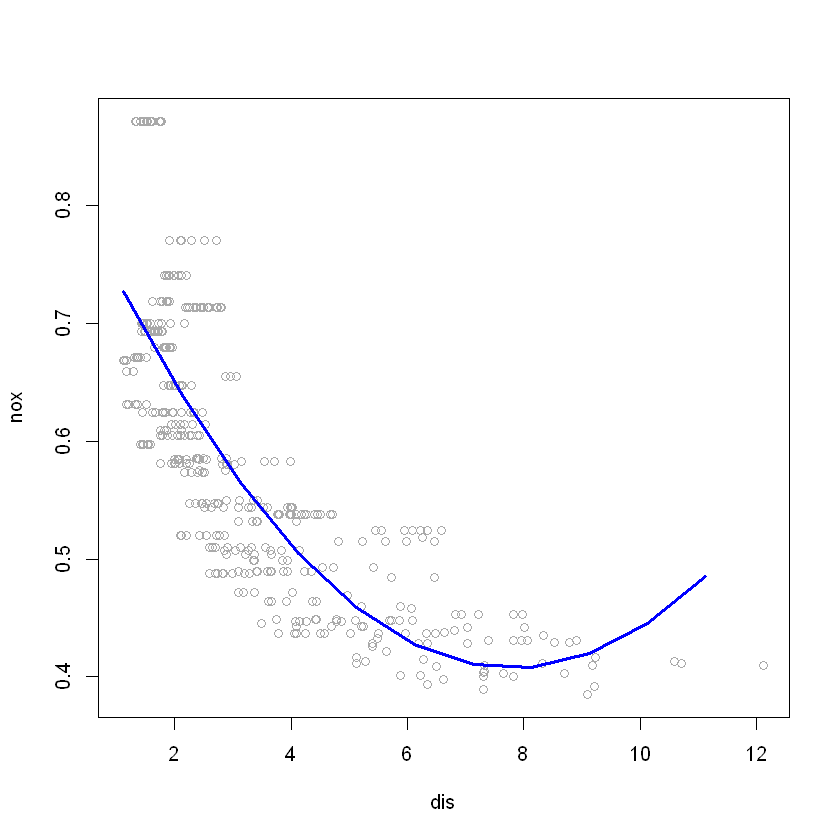

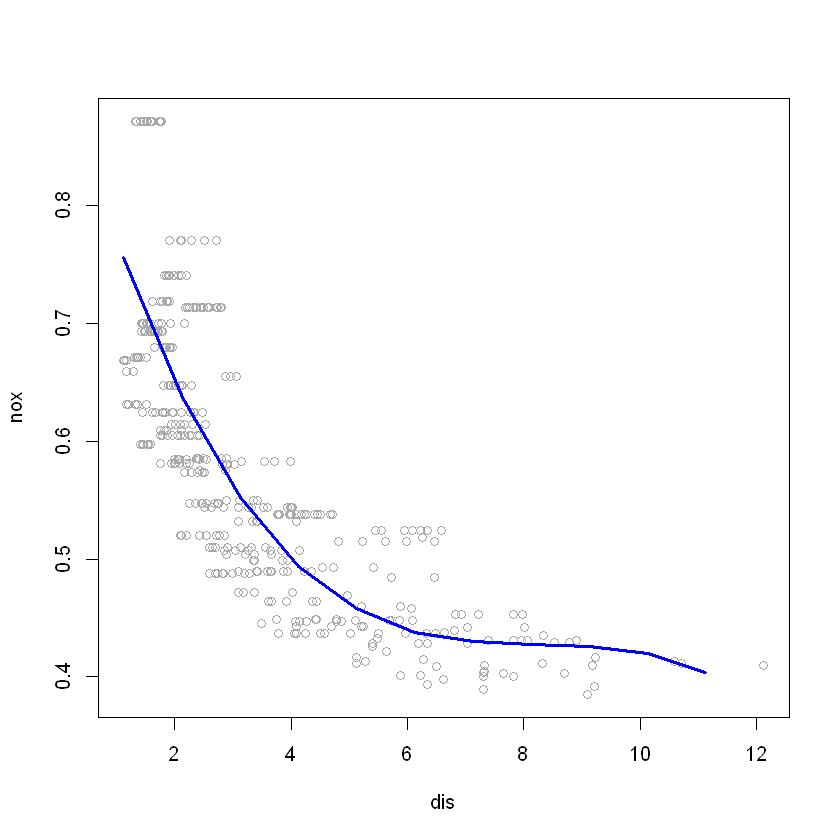

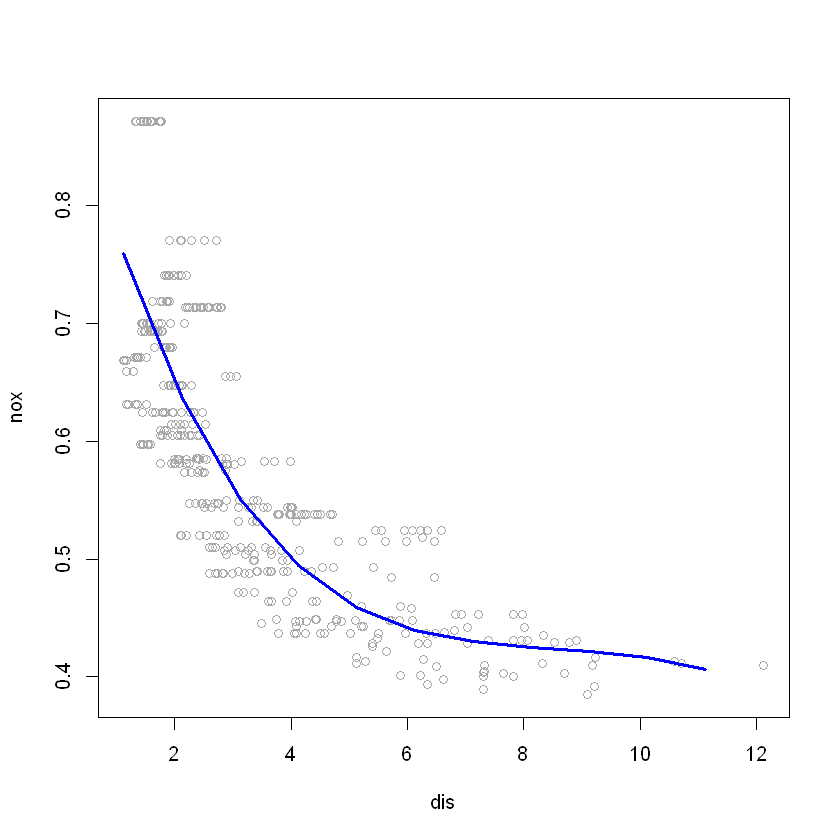

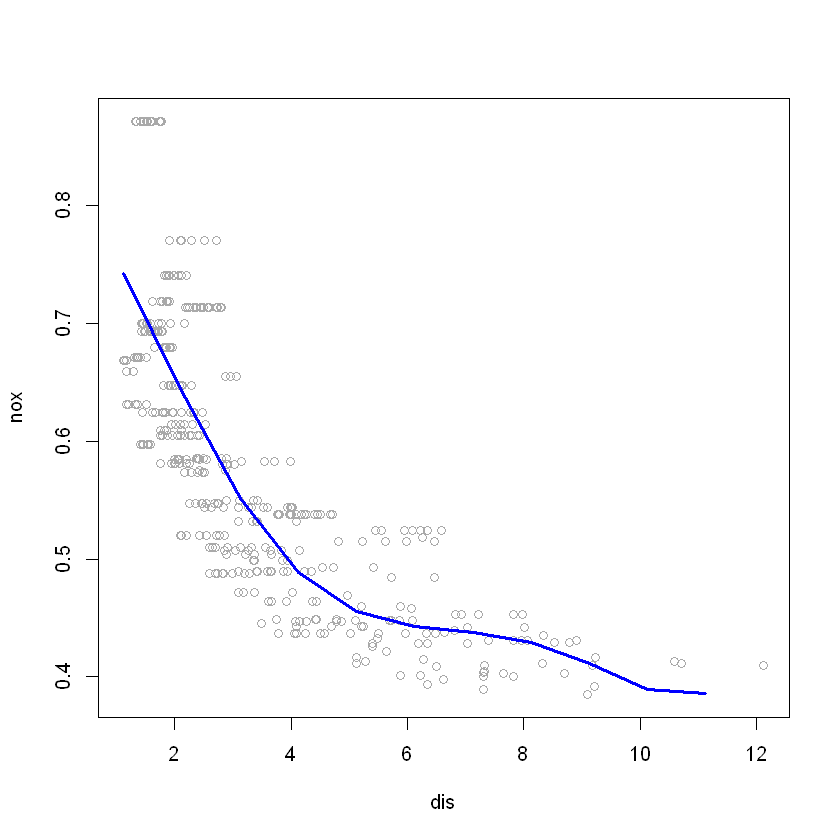

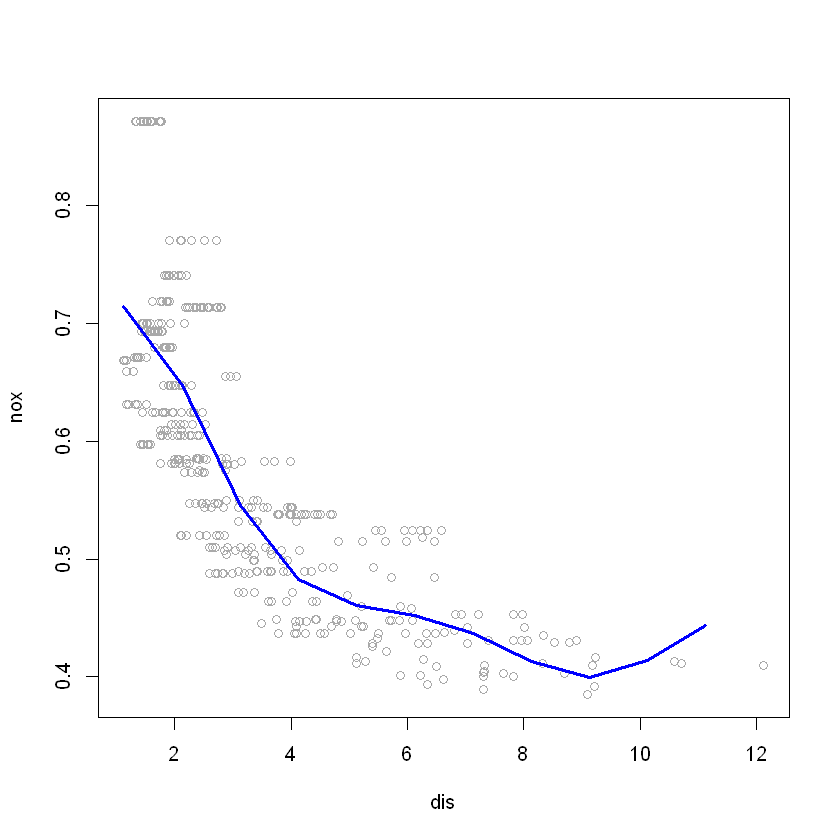

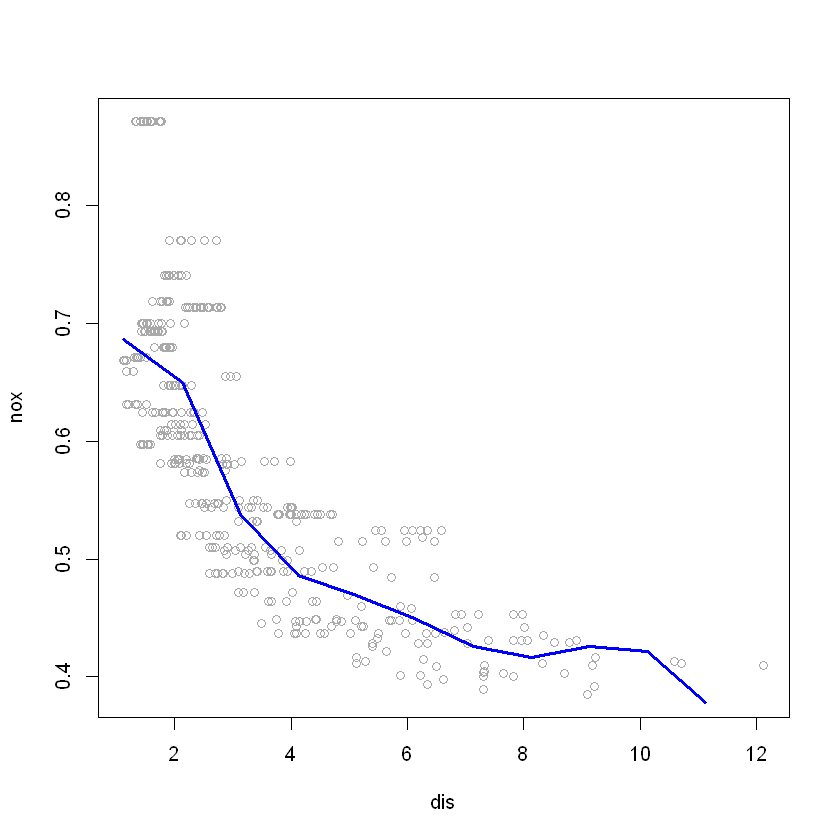

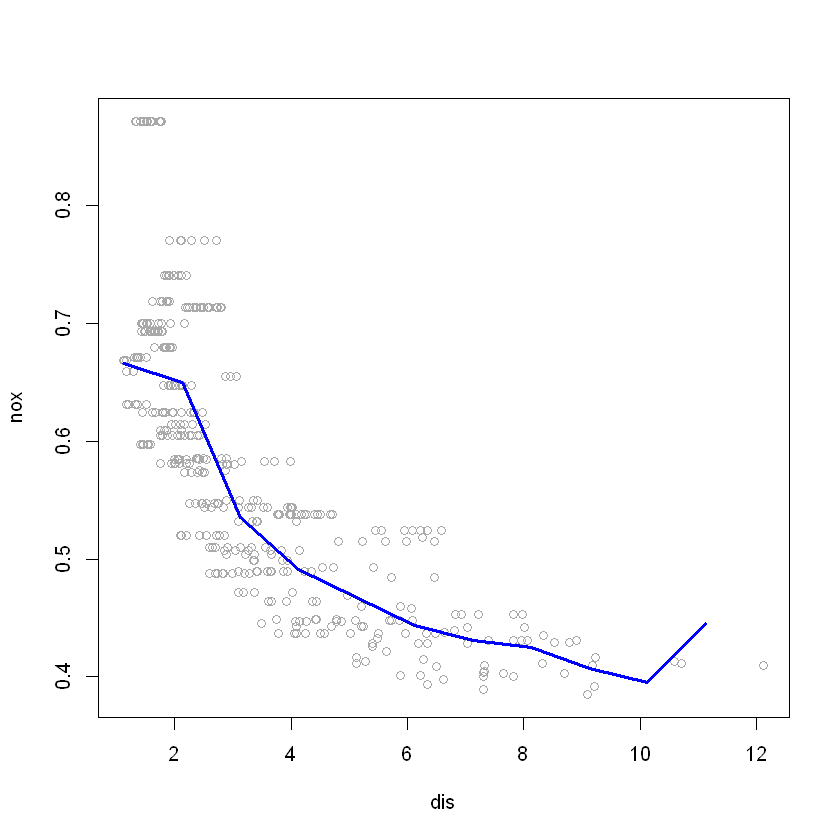

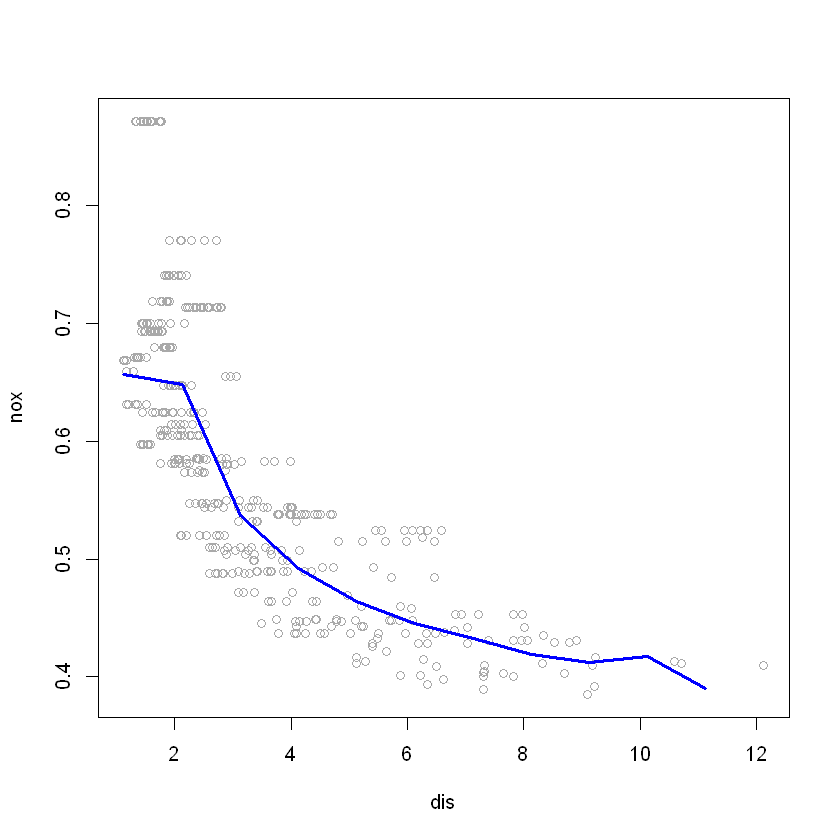

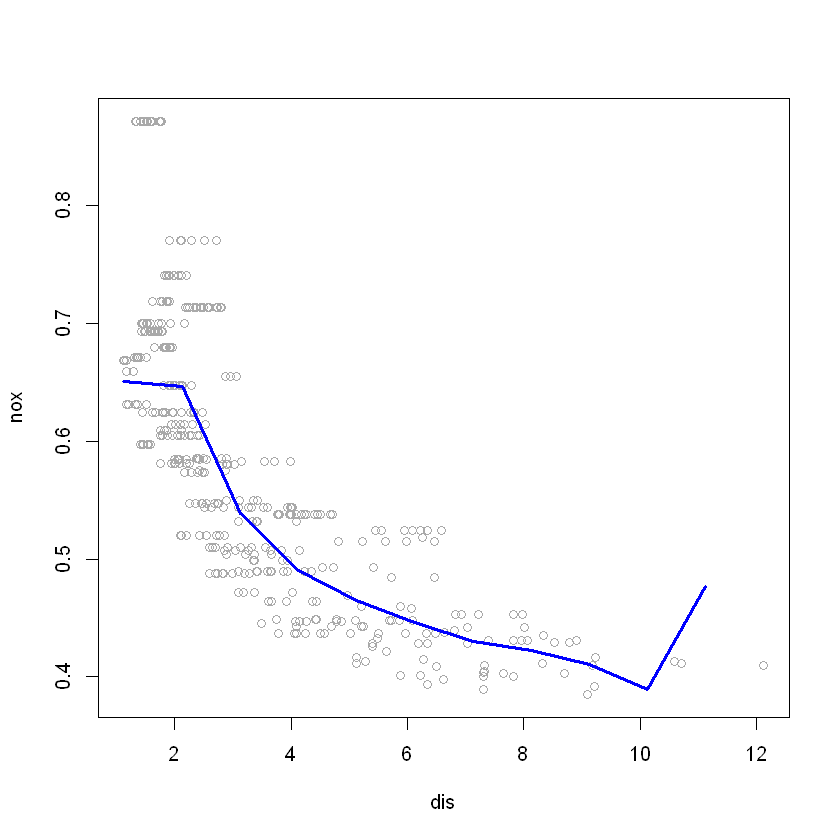

In [20]:
cvMSE = rep(NA, 10)
valMSE = rep(NA, 10)
for (i in 1:10) {
  fit = glm(nox ~ poly(dis, i), data = Boston)
  preds=predict (fit ,newdata =list(dis=dis.grid),se=TRUE)
  plot_pred(dis, Boston$nox, preds, dis.grid, 'dis', 'nox')
  valMSE[i] = mean(preds$se.fit)
  cvMSE[i] = cv.glm(Boston, fit, K = 10)$delta[1]
}


[1] 1


[1] 0.006385966

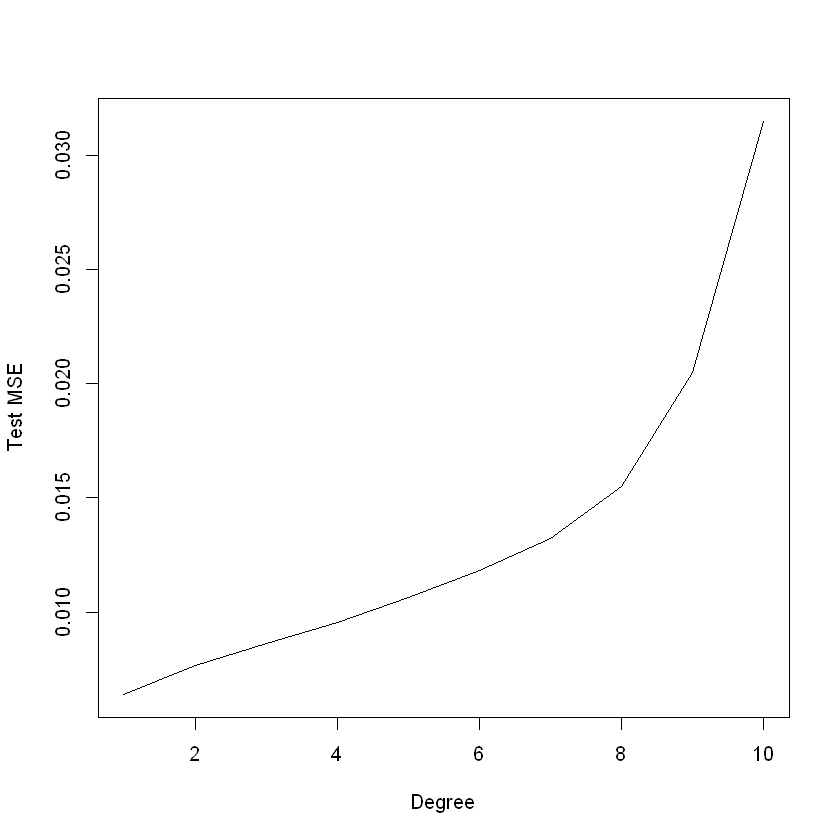

In [21]:
plot(1:10, valMSE, type = 'l', xlab = "Degree", ylab = "Test MSE")
print(which.min(valMSE))
valMSE[which.min(valMSE)]

(c) Perform cross-validation or another approach to select the optimal degree for the polynomial, and explain your results.

[1] 3


[1] 0.003878546

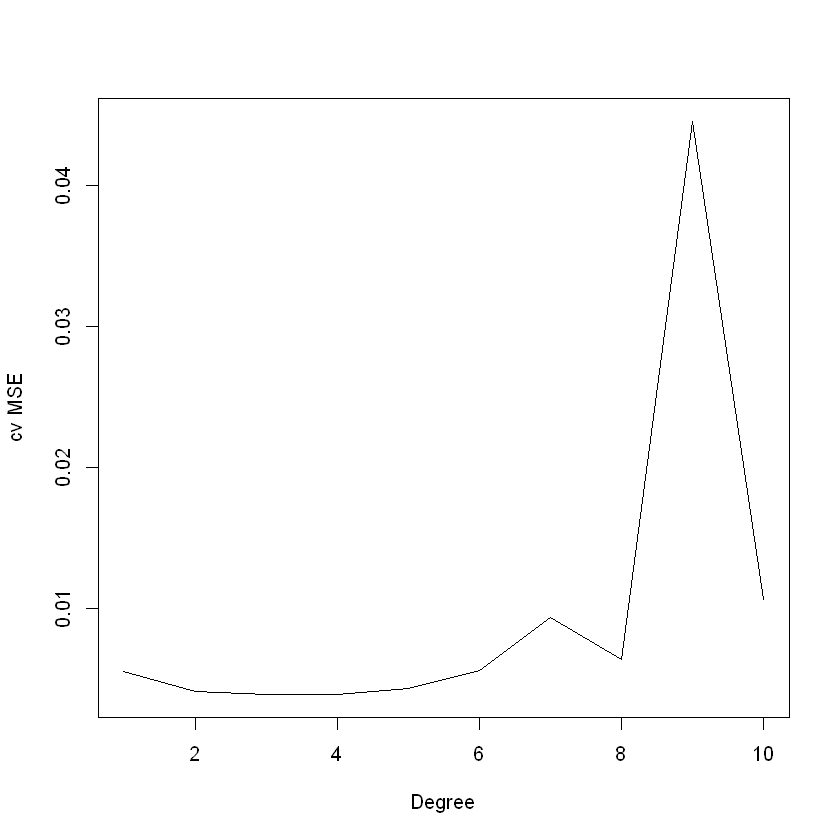

In [22]:
plot(1:10, cvMSE, type = 'l', xlab = "Degree", ylab = "cv MSE")
print(which.min(cvMSE))
cvMSE[which.min(cvMSE)]

(d) Use the bs() function to fit a regression spline to predict nox using dis. Report the output for the fit using four degrees of freedom. How did you choose the knots? Plot the resulting fit.

50% 
3.20745

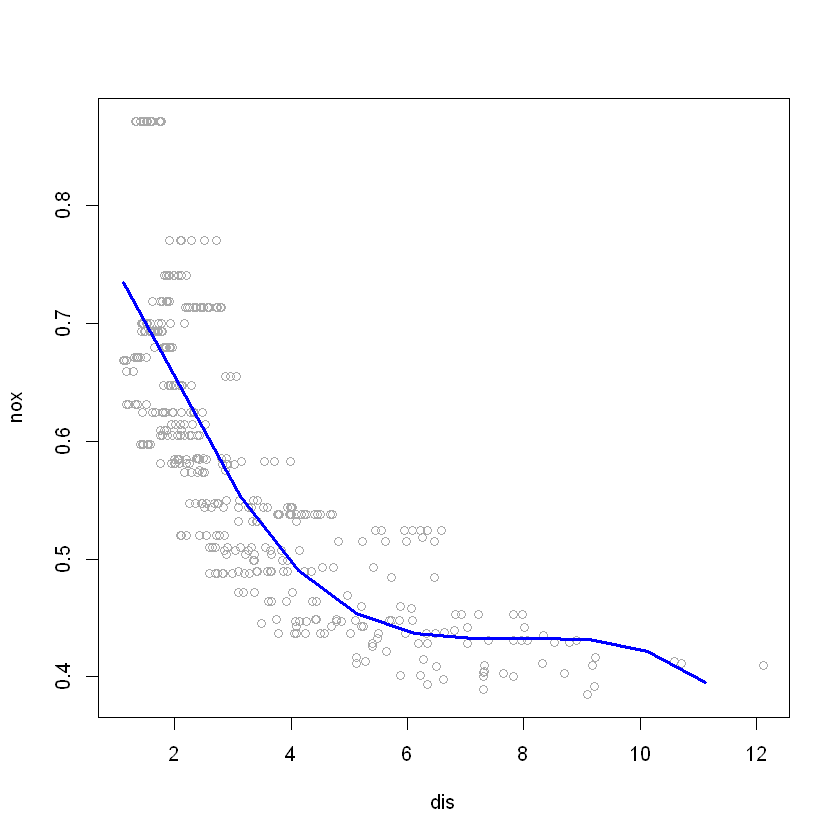

In [23]:
fit=lm(nox∼bs(dis , df=4), data=Boston)
attr(bs(Boston$dis ,df=4) ,"knots")
preds=predict(fit ,newdata =list(dis=dis.grid),se=T)
plot_pred(Boston$dis, Boston$nox, preds, dis.grid, 'dis', 'nox')

(e) Now fit a regression spline for a range of degrees of freedom, and
plot the resulting fits and report the resulting RSS. Describe the
results obtained.

Warning message in bs(dis, df = i):
"'df' was too small; have used 3"

Number of degrees of freedom:  1

Warning message in bs(dis, df = i):
"'df' was too small; have used 3"Warning message in bs(dis, df = i):
"'df' was too small; have used 3"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, df = i):
"'df' was too small; have used 3"Warning message in bs(dis, df = i):
"'df' was too small; have used 3"Warning message in bs(dis, df = i):
"'df' was too small; have used 3"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message i

Number of degrees of freedom:  2

Warning message in bs(dis, df = i):
"'df' was too small; have used 3"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, df = i):
"'df' was too small; have used 3"Warning message in bs(dis, df = i):
"'df' was too small; have used 3"Warning message in bs(dis, df = i):
"'df' was too small; have used 3"Warning message in bs(dis, df = i):
"'df' was too small; have used 3"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message i

Number of degrees of freedom:  3

Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"

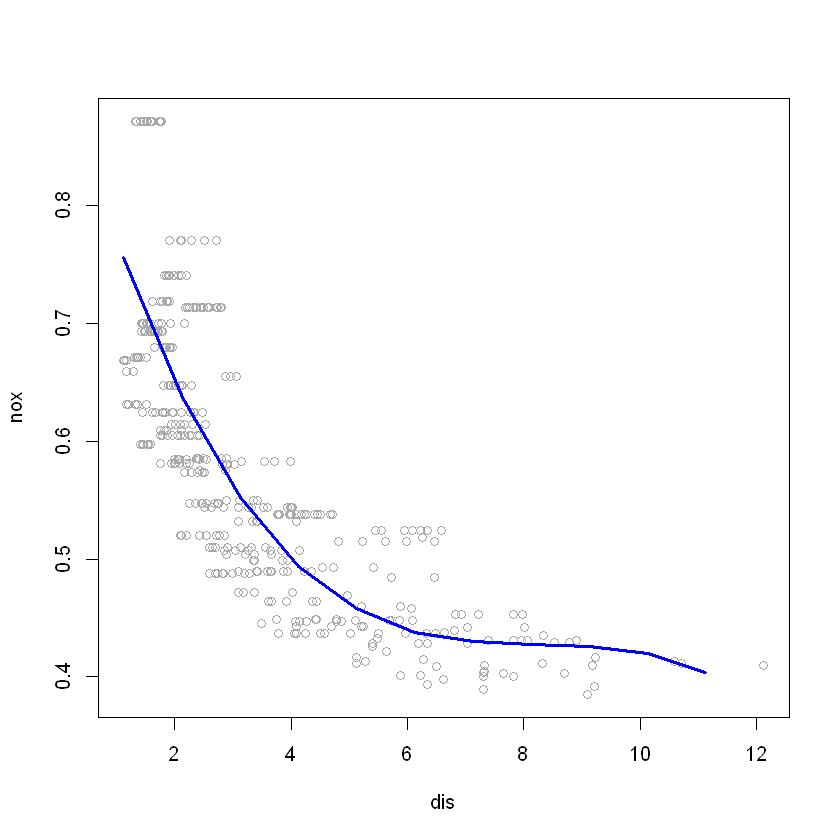

Number of degrees of freedom:  4

Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.1222), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.1222), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.1523), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.1523), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"

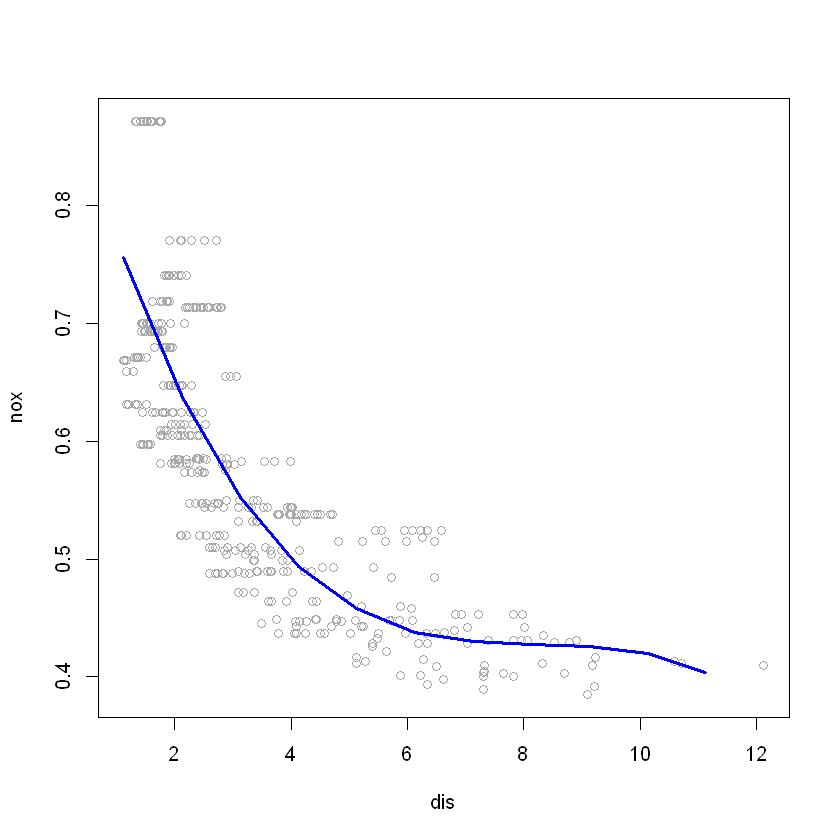

Number of degrees of freedom:  5

Warning message in bs(dis, degree = 3L, knots = c(`33.33333%` = 2.39256666666667, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`33.33333%` = 2.39256666666667, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`33.33333%` = 2.3999, `66.66667%` = 4.4534:
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`33.33333%` = 2.3999, `66.66667%` = 4.4534:
"some 'x' values beyond boundary knots may cause ill-conditioned bases"

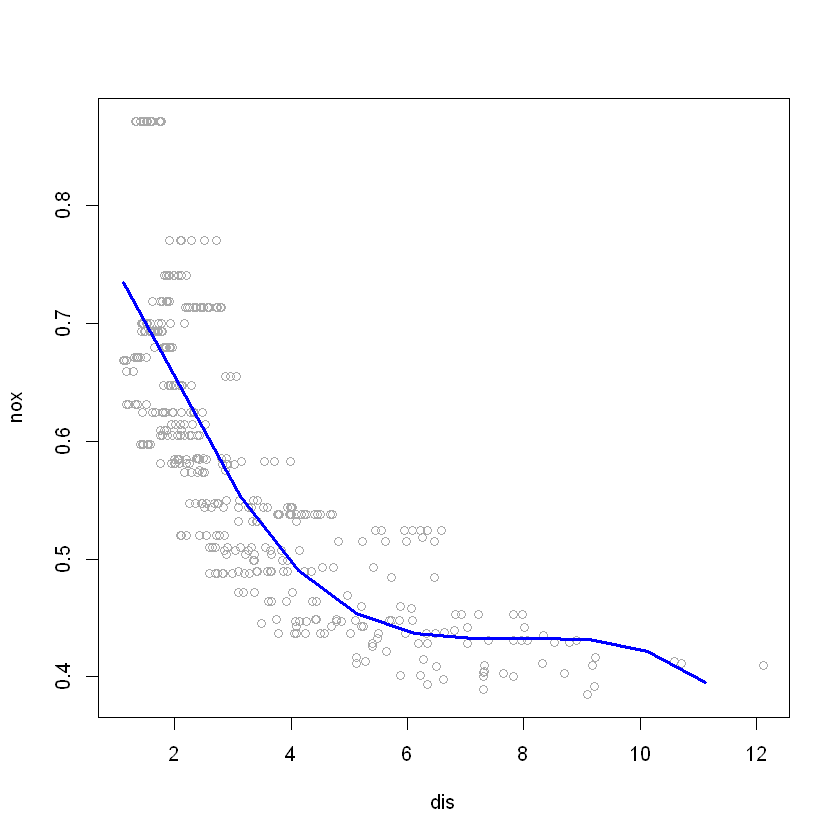

Number of degrees of freedom:  6

Warning message in bs(dis, degree = 3L, knots = c(`25%` = 2.10035, `50%` = 3.0992, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`25%` = 2.10035, `50%` = 3.0992, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`25%` = 2.106075, `50%` = 3.19095, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`25%` = 2.106075, `50%` = 3.19095, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"

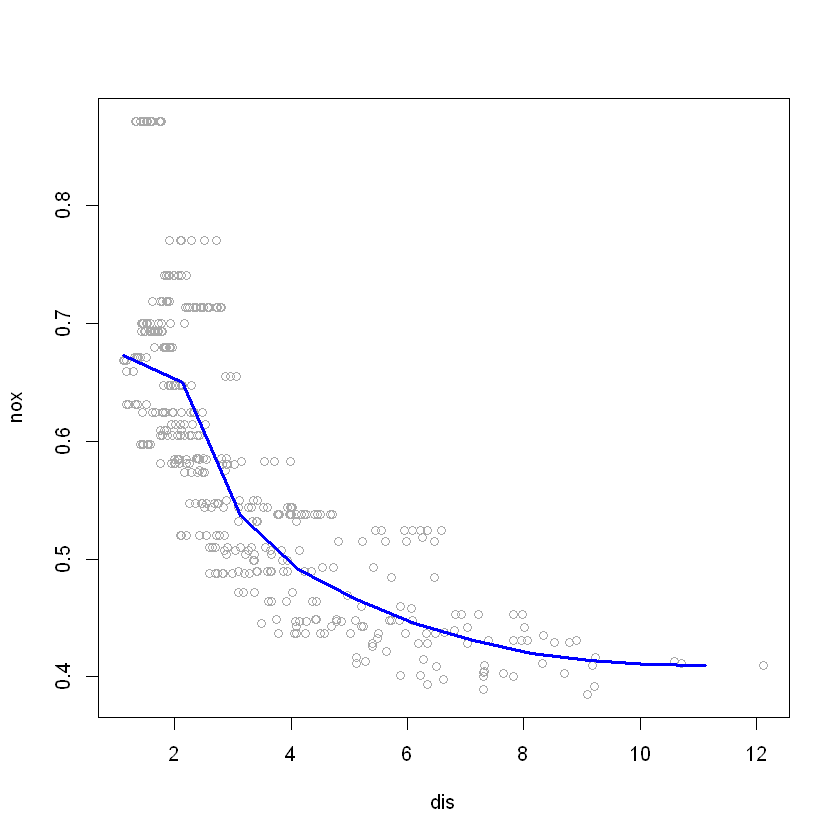

Number of degrees of freedom:  7

Warning message in bs(dis, degree = 3L, knots = c(`20%` = 1.94984, `40%` = 2.5752, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`20%` = 1.94984, `40%` = 2.5752, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`20%` = 1.95434, `40%` = 2.6427, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`20%` = 1.95434, `40%` = 2.6427, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"

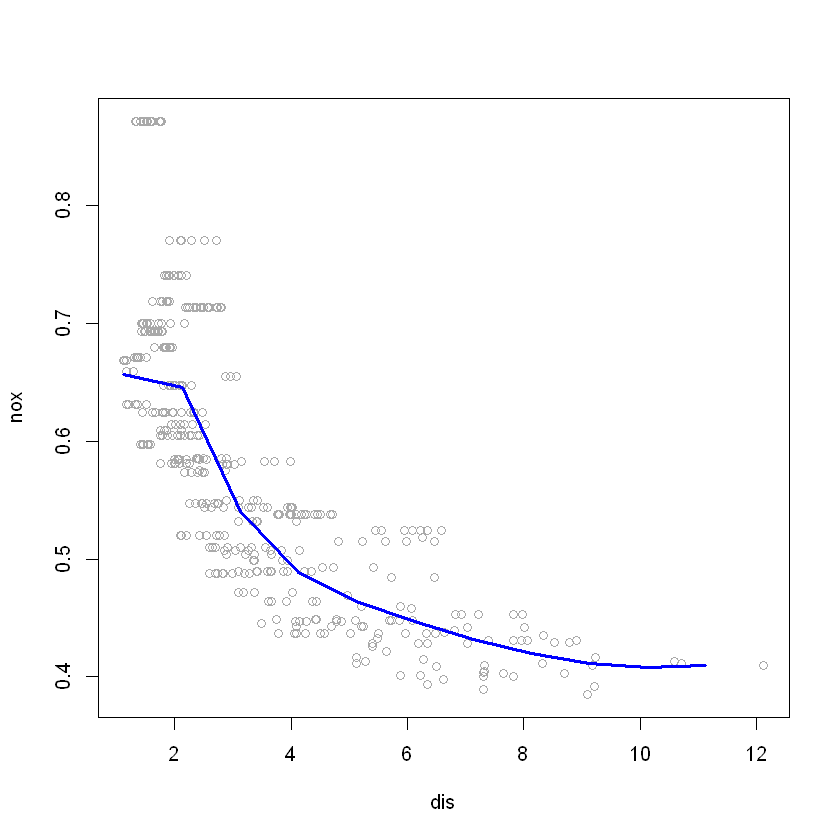

Number of degrees of freedom:  8

Warning message in bs(dis, degree = 3L, knots = c(`16.66667%` = 1.83066666666667, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`16.66667%` = 1.83066666666667, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`16.66667%` = 1.84728333333333, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`16.66667%` = 1.84728333333333, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"

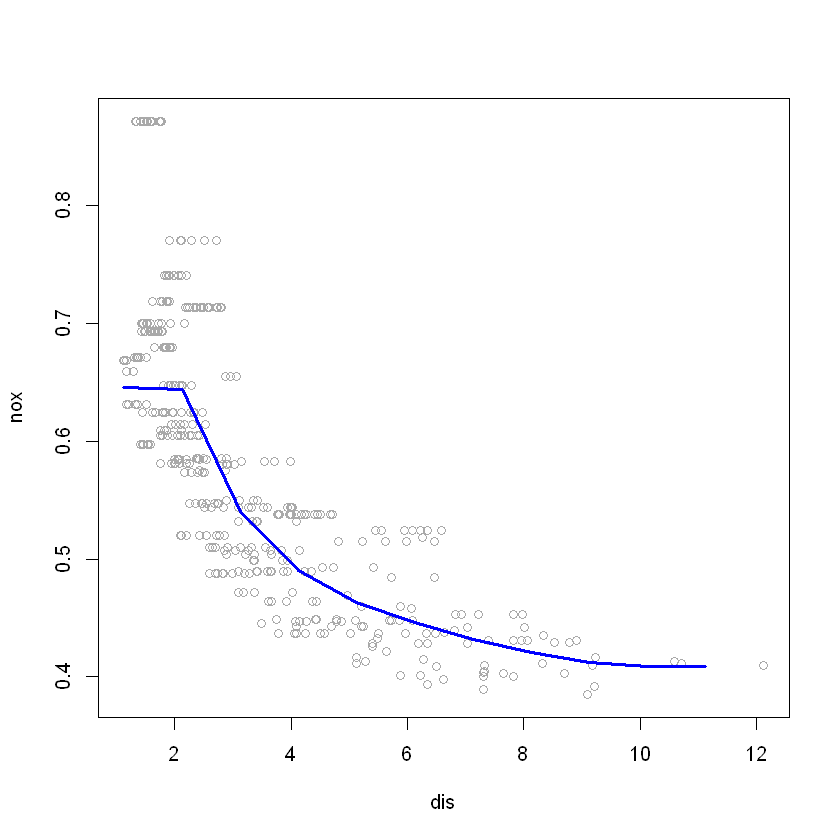

Number of degrees of freedom:  9

Warning message in bs(dis, degree = 3L, knots = c(`14.28571%` = 1.79078571428571, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`14.28571%` = 1.79078571428571, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"

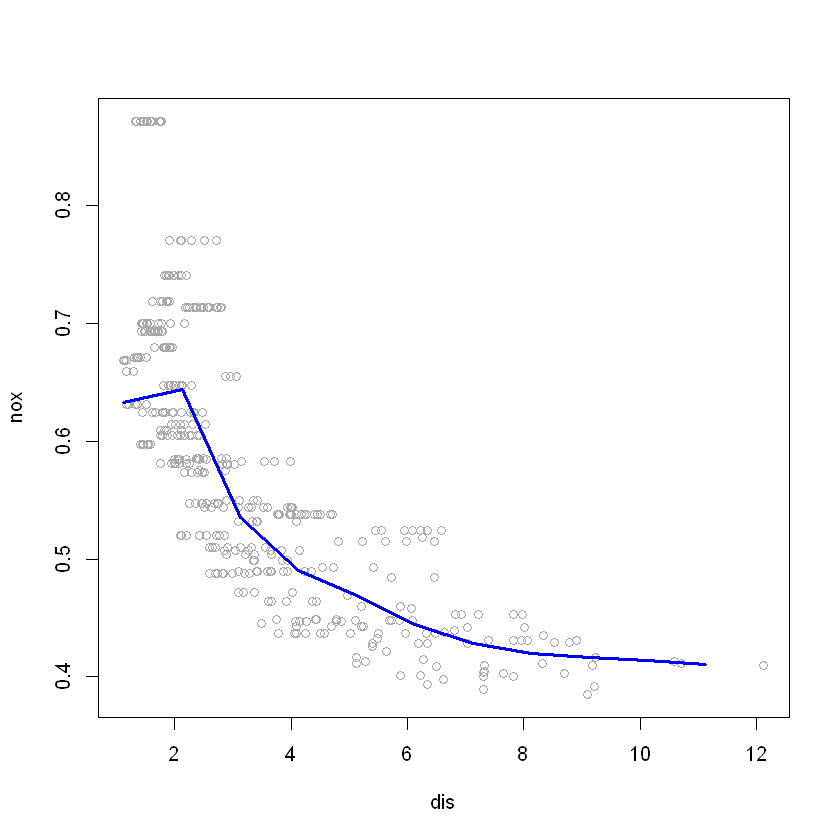

Number of degrees of freedom:  10

Warning message in bs(dis, degree = 3L, knots = c(`12.5%` = 1.748425, `25%` = 2.1088, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`12.5%` = 1.748425, `25%` = 2.1088, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`12.5%` = 1.7519375, `25%` = 2.1105, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`12.5%` = 1.7519375, `25%` = 2.1105, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"

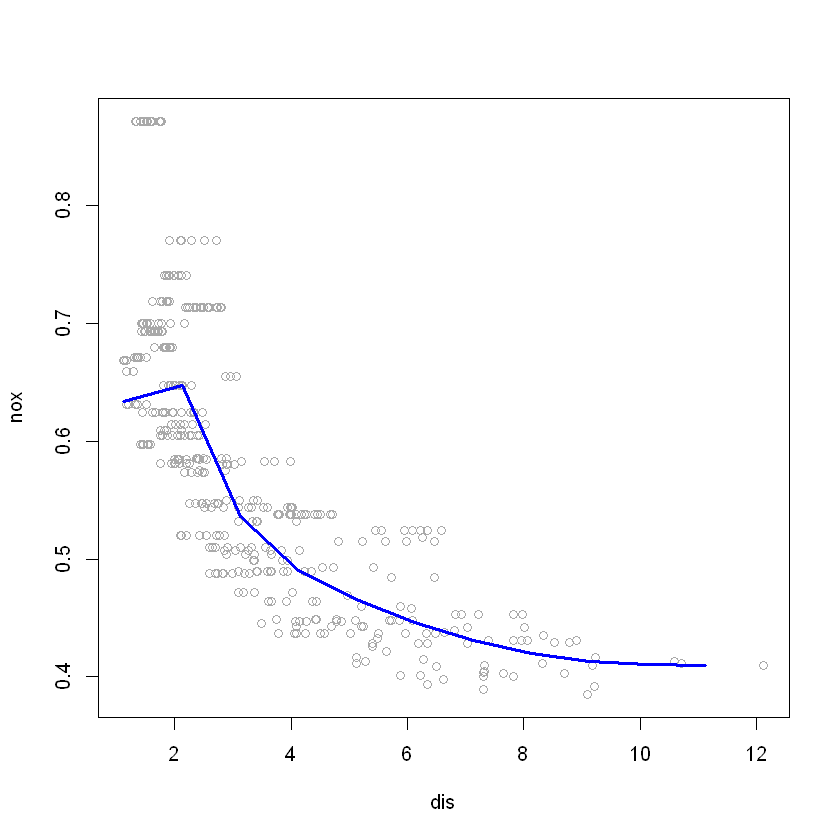

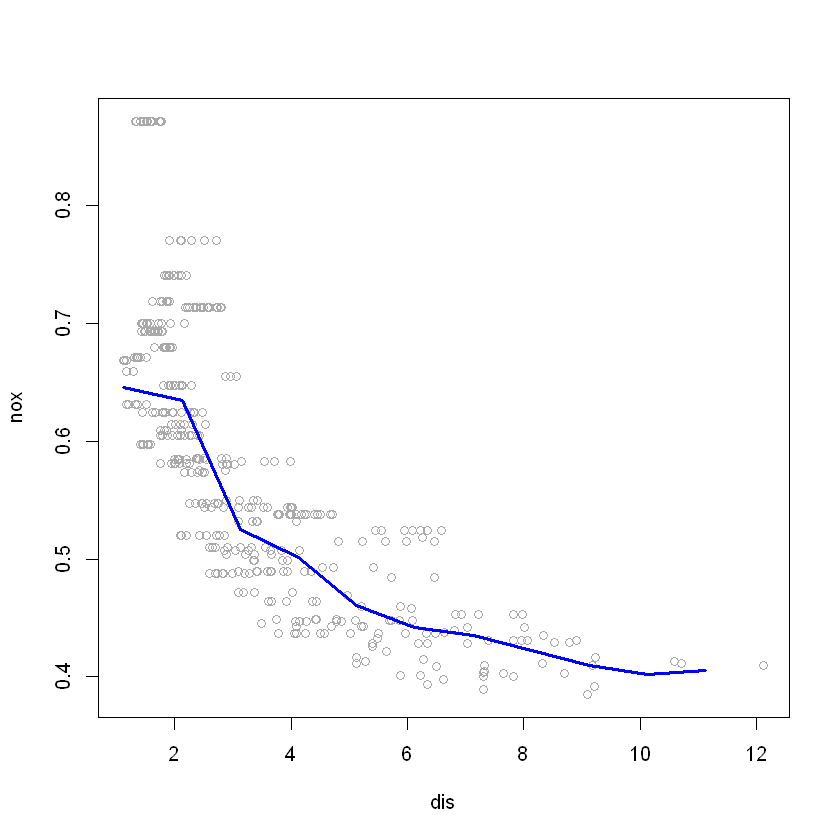

In [24]:
cvMSE = rep(NA, 10)
valMSE = rep(NA, 10)
for (i in 1:10) {
  fit = glm(nox ~ bs(dis, df=i), data = Boston)
  preds=predict (fit ,newdata =list(dis=dis.grid),se=TRUE)
  cat("Number of degrees of freedom: ", i)
  plot_pred(dis, Boston$nox, preds, dis.grid, 'dis', 'nox')
  valMSE[i] = mean(preds$se.fit)
  cvMSE[i] = cv.glm(Boston, fit, K = 10)$delta[1]
}

[1] 1


[1] 0.008632551

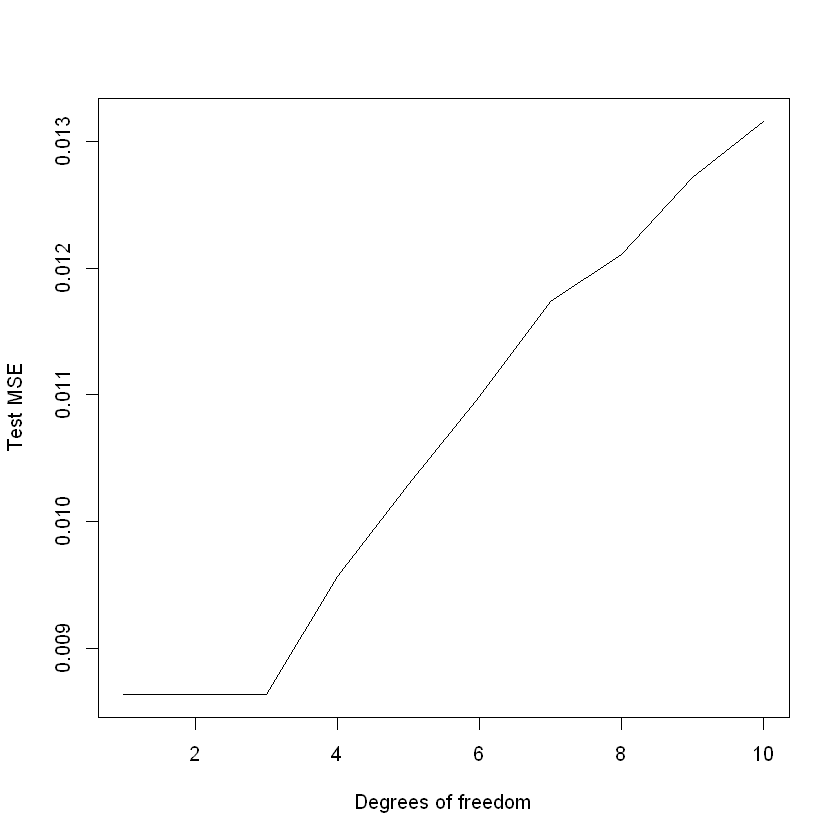

In [25]:
plot(1:10, valMSE, type = 'l', xlab = "Degrees of freedom", ylab = "Test MSE")
print(which.min(valMSE))
valMSE[which.min(valMSE)]

[1] 7


[1] 0.003690613

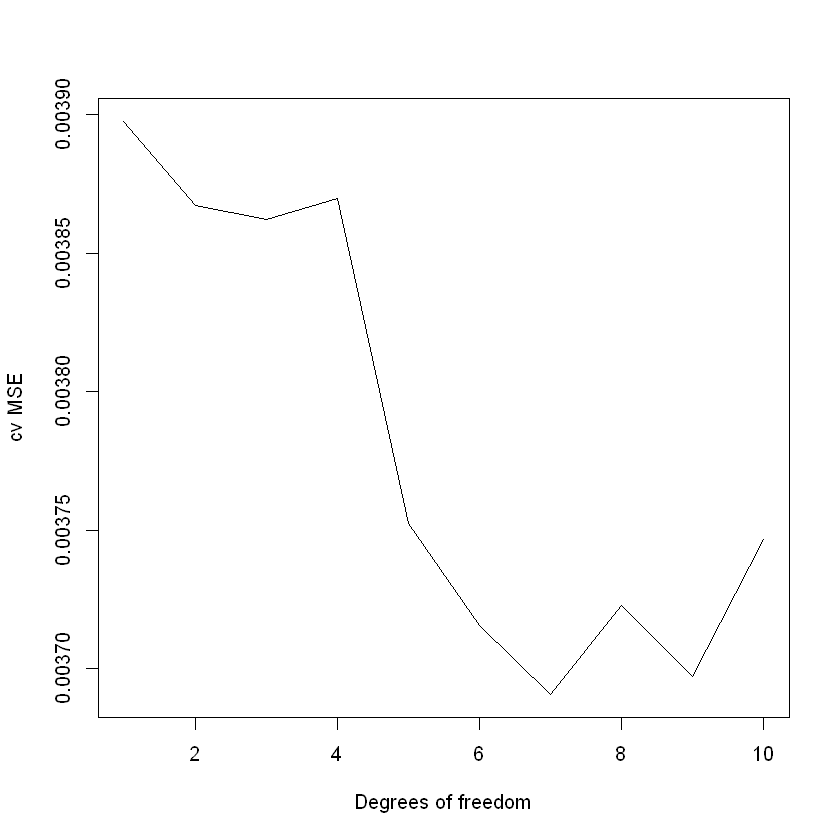

In [26]:
plot(1:10, cvMSE, type = 'l', xlab = "Degrees of freedom", ylab = "cv MSE")
print(which.min(cvMSE))
cvMSE[which.min(cvMSE)]

CV MSEs are close for splines and polynomial regression, but test MSE is higher for splines.

## Problem 10

In [27]:
head(College)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [28]:
nrow(College)

[1] 777

(a) Split the data into a training set and a test set. Using out-of-state
tuition as the response and the other variables as the predictors,
perform forward stepwise selection on the training set in order
to identify a satisfactory model that uses just a subset of the
predictors.

In [29]:
test=sample(1:111) 
regfit.fwd=regsubsets (Outstate∼., data=College[-test,], nvmax=8,
method ="forward")
reg.sum=summary(regfit.fwd)
reg.sum

Subset selection object
Call: regsubsets.formula(Outstate ~ ., data = College[-test, ], nvmax = 8, 
    method = "forward")
17 Variables  (and intercept)
            Forced in Forced out
PrivateYes      FALSE      FALSE
Apps            FALSE      FALSE
Accept          FALSE      FALSE
Enroll          FALSE      FALSE
Top10perc       FALSE      FALSE
Top25perc       FALSE      FALSE
F.Undergrad     FALSE      FALSE
P.Undergrad     FALSE      FALSE
Room.Board      FALSE      FALSE
Books           FALSE      FALSE
Personal        FALSE      FALSE
PhD             FALSE      FALSE
Terminal        FALSE      FALSE
S.F.Ratio       FALSE      FALSE
perc.alumni     FALSE      FALSE
Expend          FALSE      FALSE
Grad.Rate       FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         PrivateYes Apps Accept Enroll Top10perc Top25perc F.Undergrad
1  ( 1 ) " "        " "  " "    " "    " "       " "       " "        
2  ( 1 ) "*"        " "  " "    " "    " "       "

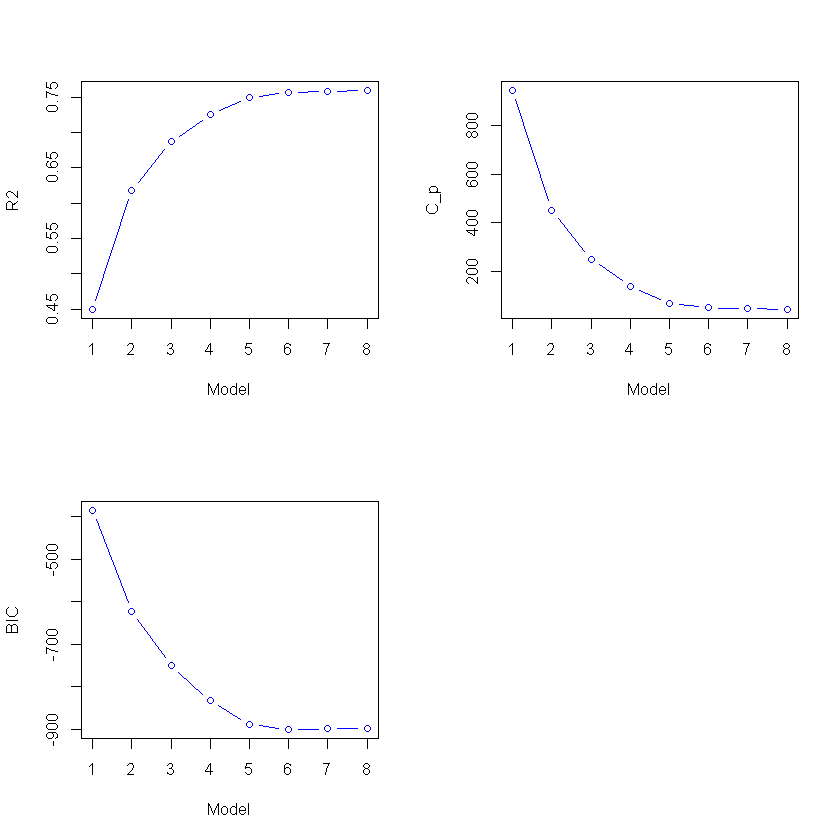

In [31]:
regsubplot(reg.sum)

Best 6 predictors

In [32]:
coef(regfit.fwd, id = 6)

(Intercept)    PrivateYes    Room.Board           PhD   perc.alumni 
-3714.6964100  2947.5339645     0.9185118    44.8439184    52.8145886 
       Expend     Grad.Rate 
    0.1985532    24.6328334

(b) Fit a GAM on the training data, using out-of-state tuition as
the response and the features selected in the previous step as
the predictors. Plot the results, and explain your findings.

Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
646.9997,2156836558,NA,NA,NA
643.9998,2144419733,2.9998616620,12416825,2.838514e-01
643.9992,2127333631,0.0006688846,17086102,7.174101e-06
634.0002,2071581767,9.9989513980,55751863,7.295849e-02


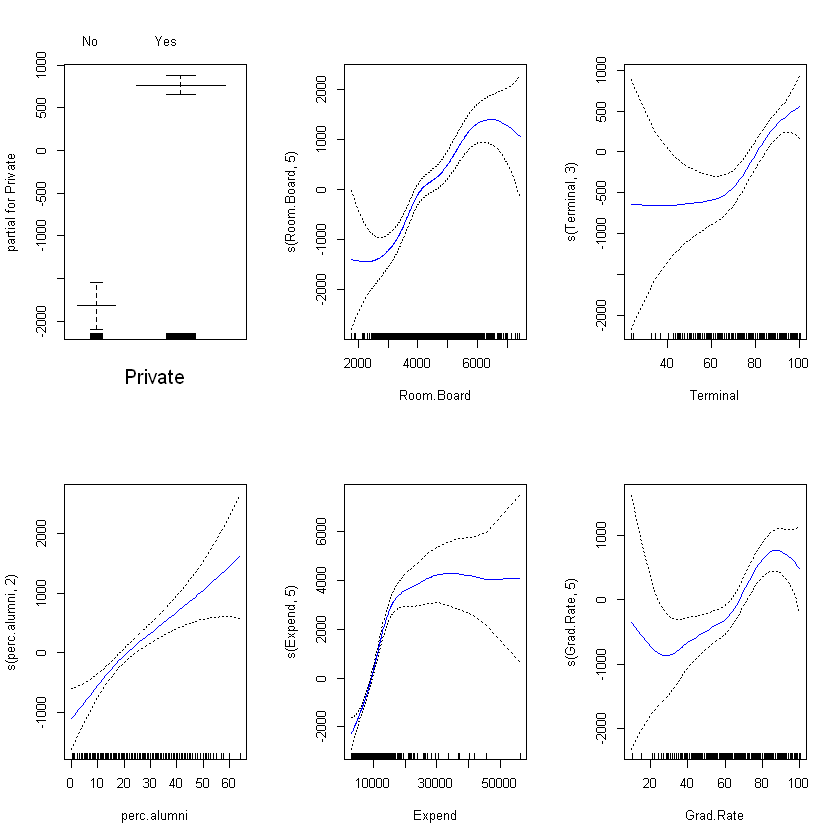

In [33]:
gam.mod0 <- gam(Outstate ~ Private + s(Room.Board, 3) + s(Terminal, 3) + s(perc.alumni, 3) + s(Expend, 5) + s(Grad.Rate, 3), data = College[-test,])
gam.mod1 <- gam(Outstate ~ Private + s(Room.Board, 4) + s(Terminal, 4) + s(perc.alumni, 4) + s(Expend, 4) + s(Grad.Rate, 4), data = College[-test,])
gam.mod2 <- gam(Outstate ~ Private + s(Room.Board, 5) + s(Terminal, 3) + s(perc.alumni, 2) + s(Expend, 5) + s(Grad.Rate, 5), data = College[-test,])
gam.mod3 <- gam(Outstate ~ Private + s(Room.Board, 6) + s(Terminal, 6) + s(perc.alumni, 6) + s(Expend, 6) + s(Grad.Rate, 6), data = College[-test,])

anova(gam.mod0, gam.mod1, gam.mod2, gam.mod3)
par(mfrow = c(2,3))
plot(gam.mod2, se = TRUE, col = 'blue')

Model 2 with different degrees polynomial fit, maximum 5th, has best p-value

(c) Evaluate the model obtained on the test set, and explain the
results obtained.

In [34]:
#Find MSE
pred=predict(gam.mod2, College[test,])
val.mse = mean((pred - College[test,]$Outstate)^2)
val.mse

[1] 4295465

In [35]:
#Find R-squared
RSS =sum((College[test,]$Outstate - pred)^2)
TSS = sum((College[test, ]$Outstate - mean(College[test, ]$Outstate)) ^ 2)
1 - (RSS / TSS)  

[1] 0.7408949

R-squared looks good.

(d) For which variables, if any, is there evidence of a non-linear
relationship with the response?

In [36]:
summary(gam.mod2)


Call: gam(formula = Outstate ~ Private + s(Room.Board, 5) + s(Terminal, 
    3) + s(perc.alumni, 2) + s(Expend, 5) + s(Grad.Rate, 5), 
    data = College[-test, ])
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-7297.43 -1139.08    64.43  1277.62  4848.13 

(Dispersion Parameter for gaussian family taken to be 3303317)

    Null Deviance: 10675721212 on 665 degrees of freedom
Residual Deviance: 2127333631 on 643.9992 degrees of freedom
AIC: 11910.61 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                   Df     Sum Sq    Mean Sq F value    Pr(>F)    
Private             1 3071244224 3071244224 929.745 < 2.2e-16 ***
s(Room.Board, 5)    1 2150801420 2150801420 651.104 < 2.2e-16 ***
s(Terminal, 3)      1  677138982  677138982 204.988 < 2.2e-16 ***
s(perc.alumni, 2)   1  432968075  432968075 131.071 < 2.2e-16 ***
s(Expend, 5)        1  789872675  789872675 239.115 < 2.2e-16 ***
s(Grad.Rate, 5)     1   95575685   95575685  28.933  1.05e-

All selected numerical features show non linear relationship.

## Problem 11

(a) Generate a response Y and two predictors X1 and X2, with
n = 100.

In [24]:
set.seed(1)
x1=rnorm(100)
x2=rnorm(100)
y=rnorm(100)

(b) Initialize βˆ1 to take on a value of your choice. It does not matter
what value you choose

In [25]:
beta1=2

(c)Keeping βˆ1 fixed, fit the model

In [26]:
a=y-beta1*x1
beta2=lm(a∼x2)$coef[2]
beta2

x2 
-0.05162176

(d) Keeping βˆ2 fixed, fit the model

In [27]:
a=y-beta2*x2
beta1=lm(a∼x1)$coef[2]
beta1

x1 
0.02111212

Write a for loop to repeat (c) and (d) 1,000 times. Report the
estimates of βˆ0, βˆ1, and βˆ2 at each iteration of the for loop.
Create a plot in which each of these values is displayed, with βˆ0,
βˆ1, and βˆ2 each shown in a different color.

In [30]:
n=100
beta0 = rep(NA, n)
beta1 = rep(NA, n)
beta2 = rep(NA, n)
beta1[1]=1
for(i in 1:n){
    a=y-beta1[i]*x1
    beta2[i]=lm(a∼x2)$coef[2]
    beta0[i]=lm(a∼x2)$coef[1]
    a=y-beta2[i]*x2
    beta1[i+1]=lm(a∼x1)$coef[2]
}

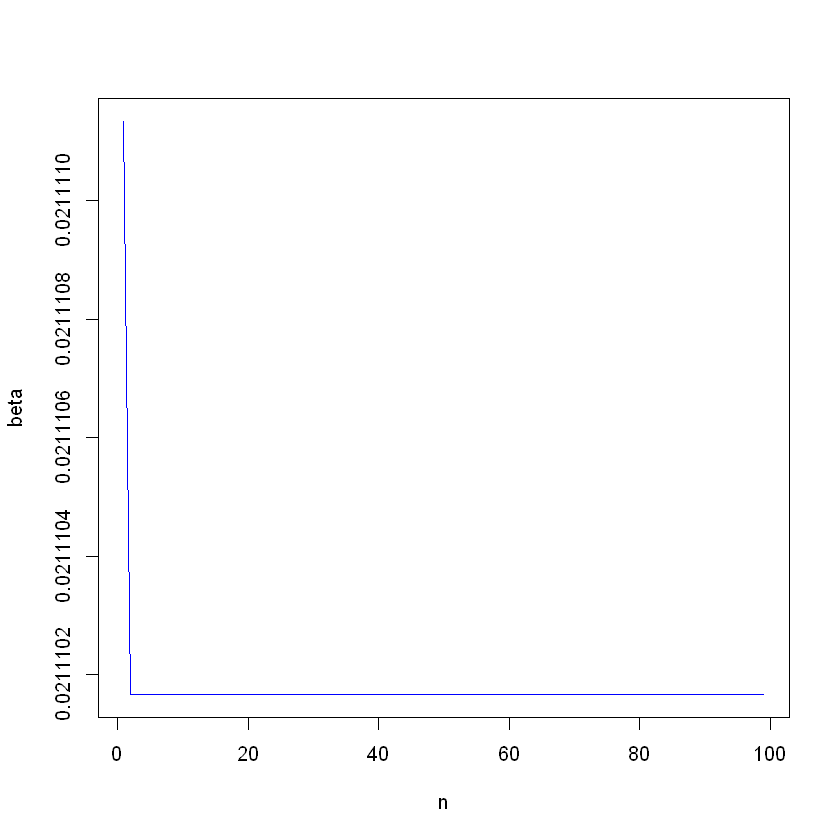

In [33]:
plot(beta1[2:n],  type = 'l', xlab = "n", ylab = "beta", col="blue")
lines(beta0[2:n],  type = 'l', col="red")
#lines(beta2[2:1000],  type = 'l', col="green")

## Problem 12

This problem is a continuation of the previous exercise. In a toy
example with p = 100, show that one can approximate the multiple
linear regression coefficient estimates by repeatedly performing simple
linear regression in a backfitting procedure. How many backfitting
iterations are required in order to obtain a “good” approximation to
the multiple regression coefficient estimates? Create a plot to justify
your answer.

In [92]:
n=9
n1=30
set.seed(1)
x = rnorm(n1)
for(i in 1:n){
    x=cbind(x, rnorm(n1))
    }
y=rnorm(n1)
df=data.frame(x)
beta=matrix(list(), nrow=n1, ncol=n+1)
beta0 = rep(NA, n1)
beta[1,1:(n+1)]=rep(1, n+1)

In [93]:
df1=data.frame(x,y)
summary(lm(y~.,df1))


Call:
lm(formula = y ~ ., data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6733 -0.5726  0.0495  0.4562  1.8956 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.07001    0.21145   0.331    0.744
x            0.18277    0.23707   0.771    0.450
V2          -0.24818    0.30914  -0.803    0.432
V3           0.42249    0.25318   1.669    0.112
V4           0.32103    0.26897   1.194    0.247
V5          -0.08635    0.26528  -0.326    0.748
V6           0.05659    0.21262   0.266    0.793
V7           0.07520    0.22476   0.335    0.742
V8          -0.23001    0.23117  -0.995    0.332
V9           0.01086    0.22810   0.048    0.963
V10         -0.14151    0.26529  -0.533    0.600

Residual standard error: 1.008 on 19 degrees of freedom
Multiple R-squared:  0.2575,	Adjusted R-squared:  -0.1334 
F-statistic: 0.6588 on 10 and 19 DF,  p-value: 0.7475


In [94]:
n=n+1
for(i in 1:(n1-1)){
    for(j in 1:(n-1)){
        j2=j+2
        j1=j+1
        j0=j-1
      #  print(rowSums(matrix(beta[i,1:j]) * df[1:j])+ rowSums(matrix(beta[i,j2:n]) * df[j2:n]))
       # print(rowSums(data.frame(mapply(`*`,df[j2:n],beta[i,j2:n])))) 
       if(j==n-1){
           a=y-rowSums(matrix(beta[i,1:j]) * df[1:j])
           }
        else{
            print(matrix(beta[i,j2:n]))
            a=y-rowSums(matrix(beta[i,1:j]) * df[1:j])- rowSums(matrix(beta[i,j2:n]) * df[j2:n])
            }
       #print(a)
       x1=df[j+1]
       dfn=data.frame(a,x1)
       #a=data.frame(a)
       colnames(dfn)[2] = "X"
       beta[i, j+1]=lm(a∼X, data=dfn)$coef[2]
       beta0[i]=lm(a∼X, data=dfn)$coef[1]
       if(j==1){
         a=y-rowSums(beta[i,j1:n]*df[j1:n])  
       }
       else { 
       a=y-rowSums(beta[i, 1:j0]*df[1:j-1])-rowSums(beta[i,j1:n]*df[j1:n])
       
    }
       x1=df[j]
       #dataframe 
       dfn=data.frame(a,x1)
       colnames(dfn)[2] = "X"
      beta[i+1, j]=lm(a∼X, data=dfn)$coef[2]  
      #initilize last in a row
      beta[i+1,n] = beta[i,n]
}
   # print(beta)
    }

     [,1]
[1,] 1   
[2,] 1   
[3,] 1   
[4,] 1   
[5,] 1   
[6,] 1   
[7,] 1   
[8,] 1   
     [,1]
[1,] 1   
[2,] 1   
[3,] 1   
[4,] 1   
[5,] 1   
[6,] 1   
[7,] 1   
     [,1]
[1,] 1   
[2,] 1   
[3,] 1   
[4,] 1   
[5,] 1   
[6,] 1   
     [,1]
[1,] 1   
[2,] 1   
[3,] 1   
[4,] 1   
[5,] 1   
     [,1]
[1,] 1   
[2,] 1   
[3,] 1   
[4,] 1   
     [,1]
[1,] 1   
[2,] 1   
[3,] 1   
     [,1]
[1,] 1   
[2,] 1   
     [,1]
[1,] 1   
     [,1]       
[1,] -0.05175824
[2,] -0.264266  
[3,] -0.1789733 
[4,] 0.2680986  
[5,] 0.7912641  
[6,] 0.4977696  
[7,] 0.2668388  
[8,] 0.3974134  
     [,1]      
[1,] -0.264266 
[2,] -0.1789733
[3,] 0.2680986 
[4,] 0.7912641 
[5,] 0.4977696 
[6,] 0.2668388 
[7,] 0.3974134 
     [,1]      
[1,] -0.1789733
[2,] 0.2680986 
[3,] 0.7912641 
[4,] 0.4977696 
[5,] 0.2668388 
[6,] 0.3974134 
     [,1]     
[1,] 0.2680986
[2,] 0.7912641
[3,] 0.4977696
[4,] 0.2668388
[5,] 0.3974134
     [,1]     
[1,] 0.7912641
[2,] 0.4977696
[3,] 0.2668388
[4,] 0.3974134
  

In [95]:
beta[20,]

[[1]]
[1] 0.1827781

[[2]]
[1] -0.2481925

[[3]]
[1] 0.4224968

[[4]]
[1] 0.3210179

[[5]]
[1] -0.08635948

[[6]]
[1] 0.05658884

[[7]]
[1] 0.07520561

[[8]]
[1] -0.2299953

[[9]]
[1] 0.01086073

[[10]]
[1] -0.1414989

For p=10 there is good agreement with lm. For large p lm stops working 